In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For doing linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#For making synthetic datasets
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs

# Scatterplots for Occular Test of Linearity

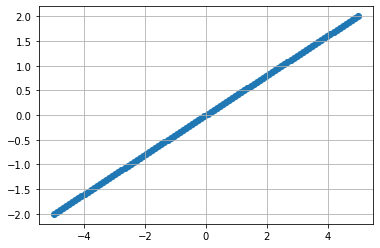

In [2]:
linear1x = np.linspace(-5,5, num=100).reshape(-1,1)
linear1y = np.linspace(-2,2, num=100) 
plt.scatter(linear1x,linear1y)
plt.grid(True)

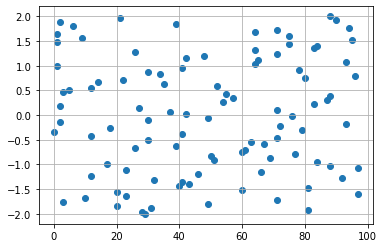

In [3]:
linear2x=np.random.randint(100, size=(100))
linear2y = np.linspace(-2,2, num=100)
plt.scatter(linear2x,linear2y)
plt.grid(True)

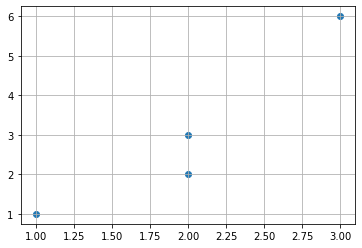

In [4]:
linear3x = [1,2,2,3]
linear3y = [1,2,3,6]
plt.scatter(linear3x,linear3y)
plt.grid(True)

(0.0, 70000.0)

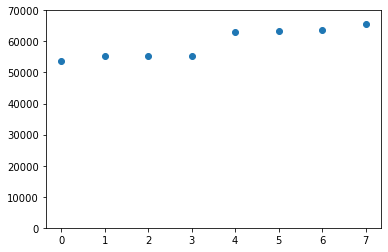

In [5]:
year = np.array([0,1,2,3,4,5,6,7]).reshape(-1,1)
income =np.array([53807,55217,55209,55415,63100,63206,63761,65766])
plt.scatter(year,income)
plt.ylim((0,70000))

Text(0, 0.5, 'Body Mass')

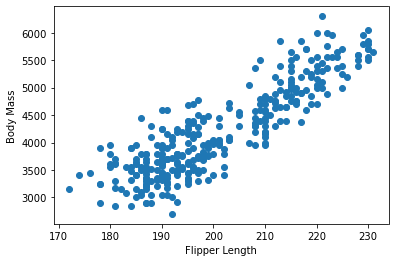

In [6]:
df = pd.read_csv('processed_penguins.csv')
#df.head()
flipper = np.array(df.flipper_length_mm).reshape(-1,1)
mass = df.body_mass_g
plt.scatter(flipper,mass)
plt.xlabel("Flipper Length")
plt.ylabel("Body Mass")

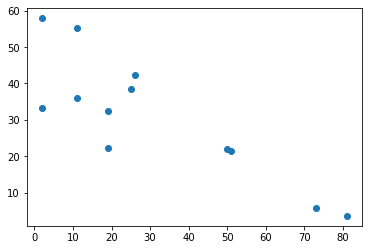

In [7]:
linear6x=np.array([50,11,2,19,26,73,81,51,11,2,19,25]).reshape(-1,1)
linear6y=[22.1,35.9,57.9,22.2,42.4,5.8,3.6,21.4,55.2,33.3,32.4,38.4]
plt.scatter(linear6x,linear6y)

# Performing Linear Regression w/Scikit-Learn

In [8]:
model1 = LinearRegression()
model1.fit(linear1x,linear1y)
model1.score(linear1x,linear1y)

1.0

In [9]:
model2 = LinearRegression()
linear2x = linear2x.reshape(-1,1)
model2.fit(linear2x,linear2y)
model2.score(linear2x,linear2y)

0.003430850030921362

In [10]:
model3 = LinearRegression()
linear3x = np.array(linear3x).reshape(-1,1)
model3.fit(linear3x,linear3y)
model3.score(linear3x,linear3y)

0.8928571428571429

In [11]:
model4 = LinearRegression()
model4.fit(year,income)
model4.score(year,income)

0.87563660998618

In [12]:
x_new = np.array([8,9,10,11,12,13,14,15]).reshape(-1,1)
y_new = model4.predict(x_new)
print(y_new)

[67905.25 69787.5  71669.75 73552.   75434.25 77316.5  79198.75 81081.  ]


In [13]:
print(model4.coef_,model4.intercept_)

[1882.25] 52847.25


$$ y=1882.25x + 52847.25 $$

In [14]:
prediction = model4.coef_*8+model4.intercept_
print(prediction)

[67905.25]


In [15]:
model5 = LinearRegression()
model5.fit(flipper,mass)
model5.score(flipper,mass)

0.7692449593460003

In [16]:
print(model5.coef_,model5.intercept_)

[50.84934701] -6017.73867019112


In [17]:
x_new = np.array([185,183,193,178]).reshape(-1,1)
y_new = model5.predict(x_new)
print(y_new)

[3389.39052715 3287.69183312 3796.18530325 3033.44509806]


In [18]:
model6 = LinearRegression()
model6.fit(linear6x,linear6y)
model6.score(linear6x,linear6y)

0.7212531656318837

In [19]:
print(model6.coef_,model6.intercept_)

[-0.53860907] 47.49044638689692


# Residuals Plots

In [20]:
def check_plots(x, y):
    fig = plt.figure(figsize=(12,10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(2, 2, 1)
    
    sns.regplot(x=x,y=y, ax=ax)
    
    ax.set_title("Linear Regressions Model")
    ax = fig.add_subplot(2, 2, 2)
    
    sns.residplot(x=x,y=y, ax=ax)
    
    ax.set_title("Residual Plot")

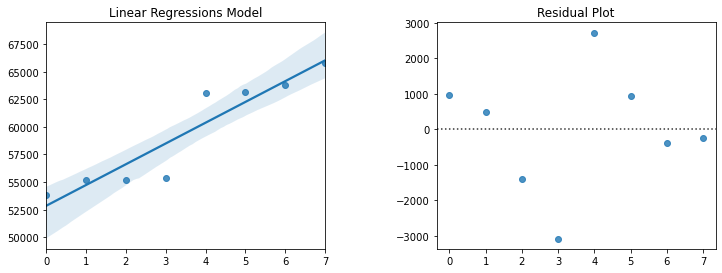

In [21]:
check_plots(year, income)

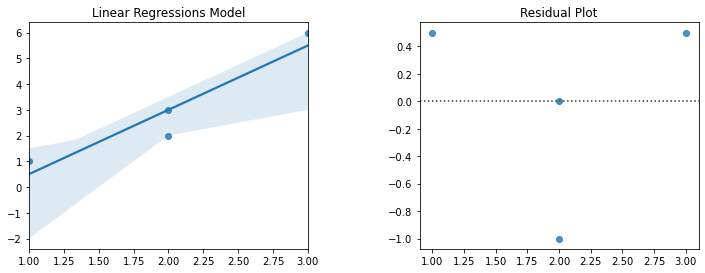

In [22]:
check_plots(linear3x, linear3y)

# Regression with statsmodels

In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [90]:
reg = ols("body_mass_g ~ flipper_length_mm", data = df).fit()

In [91]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1073.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          1.48e-104
Time:                        10:27:48   Log-Likelihood:                -2391.2
No. Observations:                 324   AIC:                             4786.
Df Residuals:                     322   BIC:                             4794.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6017.7387    313.04

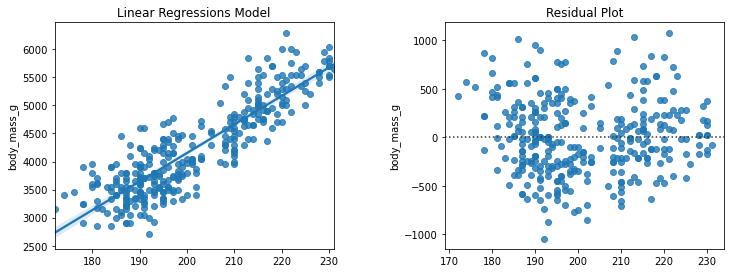

In [92]:
check_plots(flipper, mass)

In [93]:
peng_model = LinearRegression()
peng_model.fit(flipper, mass)
print("r-squared: ", peng_model.score(flipper, mass), "Coef/Intercept: ", peng_model.coef_, peng_model.intercept_)

r-squared:  0.7692449593460003 Coef/Intercept:  [50.84934701] -6017.73867019112


# Complete Example

In [23]:
df = pd.read_csv("regression_data.csv")

In [24]:
x = np.array(df.x).reshape(-1,1)
y = np.array(df.y)

In [25]:
k = 1
n = 20

In [26]:
reg_model = LinearRegression()
reg_model.fit(x,y)
r2 = reg_model.score(x,y)
print(r2)

0.9417543949390978


In [27]:
adjr2 = 1 - ((1-r2)*(n-1)/(n-k-1))

In [28]:
print(adjr2)

0.93851852799127


In [29]:
print(reg_model.coef_, reg_model.intercept_)

[3.97744361] -10.26315789473685


In [30]:
x = sm.add_constant(x, prepend=True)
mod = sm.OLS(y,x)
res = mod.fit()

In [31]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     291.0
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.47e-12
Time:                        08:58:14   Log-Likelihood:                -63.201
No. Observations:                  20   AIC:                             130.4
Df Residuals:                      18   BIC:                             132.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2632      2.793     -3.675      0.002     -16.131      -4.395
x1             3.9774      0.233     17.060      0.000       3.488       4.467
==============================================================================
Omnibus:                        0.669   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.705
Skew:                          -0.250   Prob(JB):                        0.703
Kurtosis:                       2.229   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You need to reset the x so it doesn't have the constant term, otherwise these won't work.

In [40]:
#sns.regplot(x=x,y=y)

In [41]:
#sns.residplot(x=x,y=y)

# Multi Linear Regression

In [42]:
df = pd.read_csv('processed_penguins.csv')

In [43]:
X = np.array(df[['bill_length_mm','bill_depth_mm','flipper_length_mm']])
y = np.array(df['body_mass_g'])

In [44]:
model7 = LinearRegression()
model7.fit(X,y)
model7.score(X,y)

0.7713866904423183

In [45]:
reg = ols("body_mass_g ~ flipper_length_mm + bill_length_mm", data = df).fit()

In [46]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     537.7
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          3.31e-103
Time:                        09:01:01   Log-Likelihood:                -2390.6
No. Observations:                 324   AIC:                             4787.
Df Residuals:                     321   BIC:                             4799.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5976.2214    315.168    -18.962      0.000   -6596.277   -5356.166
flipper_length_mm    49.3834      2.039     24.217      0.000      45.372      53.395
bill_length_mm        5.7535      5.194      1.108      0.269      -4.464      15.971
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.371
Skew:                           0.274   Prob(JB):                        0.112
Kurtosis:                       2.848   Cond. No.                     3.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
print(model7.coef_, model7.intercept_)

[ 4.03909549 18.40968398 51.31196355] -6604.071704801183


### Blood Pressure Data

In [49]:
df = pd.read_csv('age_bloodpressure.csv')

In [50]:
df.head()

,AGE,BP
0,20,120
1,43,128
2,63,141
3,26,126
4,53,134


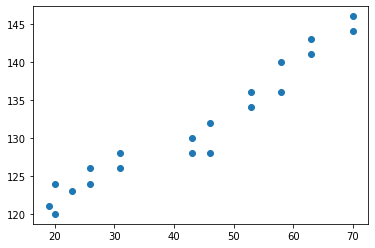

In [51]:
plt.scatter(df.AGE, df.BP)

In [52]:
model = LinearRegression()

In [53]:
X = np.array(df.AGE).reshape(-1,1)
y = np.array(df.BP)

In [54]:
model.fit(X,y)

LinearRegression()

In [55]:
model.score(X,y)

0.934506883591807

In [56]:
print(model.coef_,model.intercept_)

[0.44508909] 112.31666037282433


In [57]:
reg = ols("BP ~ AGE", data = df).fit()

In [58]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     256.8
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.24e-12
Time:                        09:01:30   Log-Likelihood:                -42.352
No. Observations:                  20   AIC:                             88.70
Df Residuals:                      18   BIC:                             90.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.3167      1.287     87.241      0.000     109.612     115.021
AGE            0.4451      0.028     16.026      0.000       0.387       0.503
==============================================================================
Omnibus:                        1.677   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.432   Jarque-Bera (JB):                1.158
Skew:                          -0.578   Prob(JB):                        0.560
Kurtosis:                       2.766   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

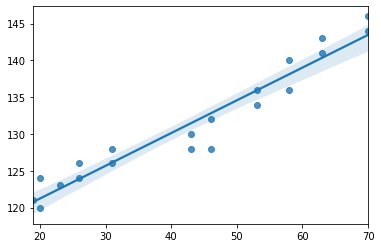

In [59]:
sns.regplot(x=X, y=y)

<AxesSubplot:>

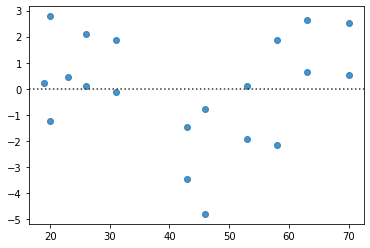

In [60]:
sns.residplot(x=X, y=y)

### Blood Flow / Blood Volume

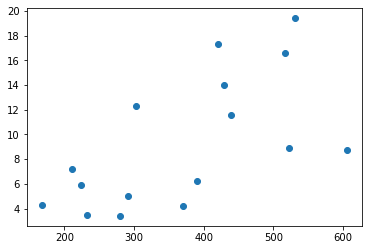

In [72]:
df = pd.read_csv("bloodflow_bloodvolume.csv")
y = np.array(df.PBF)
X = np.array(df.PBV).reshape(-1,1)
plt.scatter(df.PBV, df.PBF)

#### Using SKLearn LinearRegression

In [67]:
model = LinearRegression()
model.fit(X,y)
print(model.score(X,y))
print(model.coef_,model.intercept_)

0.39370148406345173
[0.02511939] -0.028332189936760344


#### Using Statsmodels

In [68]:
reg = ols("PBV ~ PBF", data = df).fit()
reg.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PBV   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     9.091
Date:                Mon, 29 Mar 2021   Prob (F-statistic):            0.00927
Time:                        09:06:49   Log-Likelihood:                -96.320
No. Observations:                  16   AIC:                             196.6
Df Residuals:                      14   BIC:                             198.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    225.2671     55.124      4.087      0.001     107.039     343.496
PBF           15.6732      5.198      3.015      0.009       4.524      26.822
==============================================================================
Omnibus:                        3.038   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                1.599
Skew:                           0.771   Prob(JB):                        0.450
Kurtosis:                       3.145   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

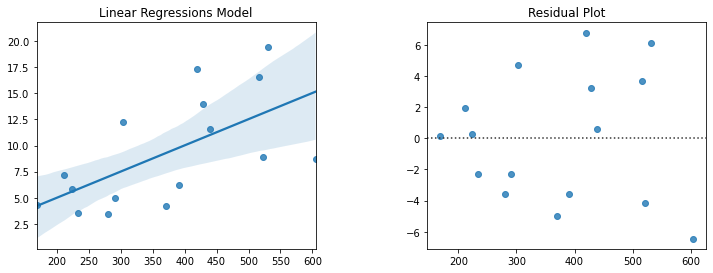

In [70]:
check_plots(X,y)

#### Grades/BoardScores

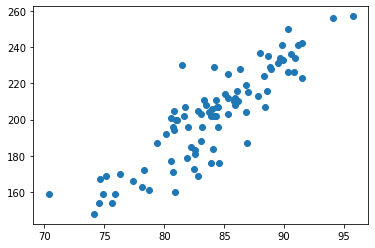

In [73]:
df = pd.read_csv("grades_boardscores.csv")
y = np.array(df.BOARD)
X = np.array(df.AVG).reshape(-1,1)
plt.scatter(df.AVG, df.BOARD)

#### Using SKLearn LinearRegression

In [74]:
model = LinearRegression()
model.fit(X,y)
print(model.score(X,y))
print(model.coef_,model.intercept_)

0.7721143098485997
[4.68149199] -191.0295767253587


#### Using Statsmodels

In [75]:
reg = ols("BOARD ~ AVG", data = df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BOARD   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     294.8
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.11e-29
Time:                        09:11:22   Log-Likelihood:                -350.01
No. Observations:                  89   AIC:                             704.0
Df Residuals:                      87   BIC:                             709.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -191.0296     22.934     -8.329      0.000    -236.614    -145.445
AVG            4.6815      0.273     17.169      0.000       4.140       5.223
==============================================================================
Omnibus:                        2.271   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.758
Skew:                          -0.133   Prob(JB):                        0.415
Kurtosis:                       3.635   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

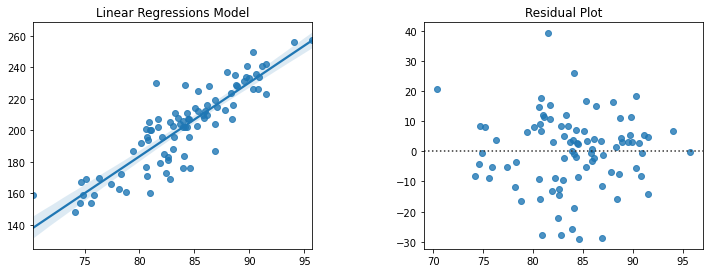

In [76]:
check_plots(X,y)

#### Methodone QTC

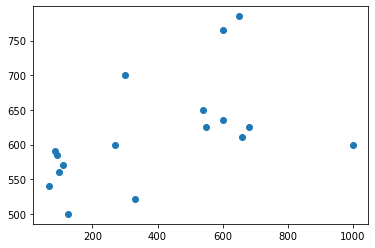

In [79]:
df = pd.read_csv("methodone_qtc.csv")
y = np.array(df.QTC)
X = np.array(df.DOSE).reshape(-1,1)
plt.scatter(df.DOSE, df.QTC)

#### Using SKLearn LinearRegression

In [80]:
model = LinearRegression()
model.fit(X,y)
print(model.score(X,y))
print(model.coef_,model.intercept_)

0.2638596030264766
[0.13988633] 559.9028012528518


#### Using Statsmodels

In [82]:
reg = ols("QTC ~ DOSE", data = df).fit()
reg.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    QTC   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     5.377
Date:                Mon, 29 Mar 2021   Prob (F-statistic):             0.0349
Time:                        09:13:51   Log-Likelihood:                -94.858
No. Observations:                  17   AIC:                             193.7
Df Residuals:                      15   BIC:                             195.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    559.9028     29.129     19.221      0.000     497.815     621.990
DOSE           0.1399      0.060      2.319      0.035       0.011       0.268
==============================================================================
Omnibus:                        2.074   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.257
Skew:                           0.662   Prob(JB):                        0.533
Kurtosis:                       2.859   Cond. No.                         849.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

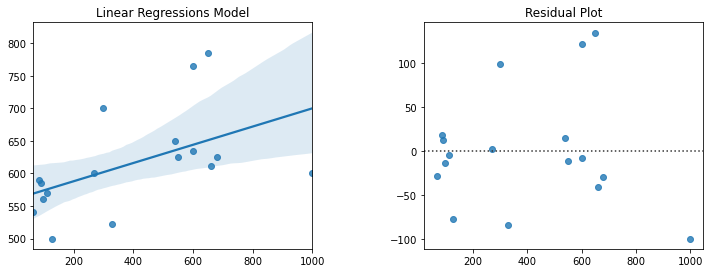

In [83]:
check_plots(X,y)

# Using the Normal Equation
You can solve this analytically with the Normal Equation and linear algebra.  Computationally intensive though!

$$ \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

Transpose the matrix

In [185]:
step1 = x.T

Get product of x and transpose of x

In [186]:
step2 = np.dot(step1, x)

Invert the step2 matrix

In [187]:
step3 = np.linalg.inv(step2)

Multiply inverted matrix with transpose of x

In [188]:
step4 = np.dot(step3, step1)

Multiply by y

In [189]:
result = np.dot(step4, y)

In [190]:
result

array([-10.26315789,   3.97744361])

# Gradient Descent
You can also estimate the parameters for linear regression with gradient descent.  This computationally much cheaper, but will not give an exact solution.  Not going to do this - it is very messy!